## This is the Jupyter notebook with python code to load in the preprocessed response time data, to create the figures in the manuscript, and to create a .csv file for further statistical analysis in MATLAB. 

#BSD-3 License

### import necessary packages

In [22]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

sns.set_context("poster") # this makes things large 

%matplotlib inline

In [23]:
### decide whether or not to save figures and data for MATLAB

saveFig = False
saveMat = False

In [24]:
### import the .mat data files


#mat1 = loadmat('3ada8b_compareResponse_block_tactorSub1',squeeze_me=1)
#mat2 = loadmat('3ada8b_compareResponse_block_tactorSub2',squeeze_me=1)


mat1 = loadmat('3ada8b_compareResponse_block_1_changePts_noDelay',squeeze_me=1)
mat2 = loadmat('3ada8b_compareResponse_block_2_changePts_noDelay',squeeze_me=1)

In [25]:
### extract variables of interest
### respLo = the minimum response time
### respHi = the maximum response time

respLo = 150 # minimum response time - 150 ms
respHi = 1000 # maximum response time - 1000 ms

button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']


In [26]:
### prepare for pandas data frame


a = np.arange(0,button1.shape[0])
ndata1 = {n: 1e3*button1[n] for n in a}
a = np.arange(0,button2.shape[0])
ndata2 = {n: 1e3*button2[n] for n in a}


In [27]:
### make pandas dataframes


dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')
#dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')
dataFdict2 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in ndata2.items() ]))

In [28]:
### assign columns for dataframes


dataFdict1.columns = ['Haptic','Null','Off-Target','1.25 mA','0.8 mA','3 mA','2 @ 3 mA, 38 @ 1.25 mA','2 @ 3, 38 @ 0.8 mA']
dataFdict2.columns = ['Null','2 @ 3 mA, 38 @ 1.25 mA','2 @ 3 mA']


dataMelt1 = pd.melt(dataFdict1)
#dataMelt1['Subject'] = 'a1355e'
dataMelt1['Subject'] = '1'
dataMelt1['block'] = '1'
               
dataMelt2 = pd.melt(dataFdict2)
#dataMelt2['Subject'] = 'a1355e'
dataMelt2['Subject'] = '1'
dataMelt2['block'] = '2'
dataMelt1.rename(columns = {'variable':'Experiment','value':'Response Time (ms)'}, inplace = True)
dataMelt2.rename(columns = {'variable':'Experiment','value':'Response Time (ms)'}, inplace = True)


In [29]:
### concatenate

frames = [dataMelt1,dataMelt2]

result = pd.concat(frames)
result
resultTrim = result[(result['Response Time (ms)'] < respHi) & (result['Response Time (ms)'] > respLo)]
resultTrim.groupby(['Experiment','Subject','block']).mean()

experimentsOfInt =  ['Haptic','1.25 mA','0.8 mA','3 mA','2 @ 3 mA, 38 @ 1.25 mA','2 @ 3, 38 @ 0.8 mA','2 @ 3 mA, 38 @ 1.25 mA','2 @ 3 mA']

In [30]:
### look at various metrics of interest


dataCleaned = resultTrim[resultTrim['Experiment'].isin(experimentsOfInt)]
dataCleaned.groupby(['Experiment','Subject','block']).mean()
dataCleaned.groupby(['Experiment','Subject','block']).describe()
dataCleaned.groupby(['Subject','Experiment']).describe().round()

#dataCleaned.groupby(['Subject','experiment']).mean()
#dataCleaned.groupby(['Subject','experiment']).std()

# get counts of each type
#dataCleaned.groupby(['Subject','experiment']).count()

Response Time (ms)                              \
                                            count   mean    std    min    25%   
Subject Experiment                                                              
1       1.25 mA                              13.0  351.0   73.0  254.0  310.0   
        2 @ 3 mA                             17.0  411.0   67.0  256.0  396.0   
        2 @ 3 mA, 38 @ 1.25 mA               34.0  323.0  133.0  219.0  249.0   
        2 @ 3, 38 @ 0.8 mA                    7.0  468.0  114.0  331.0  398.0   
        3 mA                                 20.0  271.0   99.0  164.0  240.0   
        Haptic                               12.0  190.0   40.0  153.0  164.0   

                                                     
                                  50%    75%    max  
Subject Experiment                                   
1       1.25 mA                 322.0  383.0  519.0  
        2 @ 3 mA                410.0  442.0  523.0  
        2 @ 3 mA, 38 @ 1.25 mA  268.0  347.0  796.0  
        2 @ 3, 38 @ 0.8 mA      422.0  541.0  645.0  
        3 mA                    251.0  262.0  629.0  
        Haptic                  173.0  208.0  268.0

In [31]:
typeOrderSort= ['1.25 mA','0.8 mA','3 mA','2 @ 3 mA, 38 @ 1.25 mA','2 @ 3, 38 @ 0.8 mA','2 @ 3 mA, 38 @ 1.25 mA','2 @ 3 mA']
dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.Experiment.isin(typeOrderSort))


dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(dataCleaned.Experiment.isin(typeOrderSort),other='1')
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(~dataCleaned.Experiment.isin(typeOrderSort),other='0') 

dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.Experiment.isin(typeOrderSort))


In [32]:
dataCleaned[dataCleaned['Experiment'] == '2 @ 3 mA, 38 @ 1.25 mA']

,Experiment,Response Time (ms),Subject,block,typeOrder
120,"2 @ 3 mA, 38 @ 1.25 mA",795.60704,1,1,True
121,"2 @ 3 mA, 38 @ 1.25 mA",731.05408,1,1,True
122,"2 @ 3 mA, 38 @ 1.25 mA",534.69184,1,1,True
123,"2 @ 3 mA, 38 @ 1.25 mA",269.76256,1,1,True
124,"2 @ 3 mA, 38 @ 1.25 mA",254.93504,1,1,True
125,"2 @ 3 mA, 38 @ 1.25 mA",242.60608,1,1,True
126,"2 @ 3 mA, 38 @ 1.25 mA",300.31872,1,1,True
127,"2 @ 3 mA, 38 @ 1.25 mA",326.08256,1,1,True
129,"2 @ 3 mA, 38 @ 1.25 mA",242.85184,1,1,True
130,"2 @ 3 mA, 38 @ 1.25 mA",353.52576,1,1,True


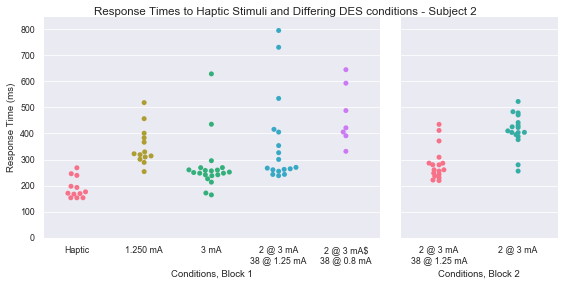

In [34]:

fig = plt.figure(figsize=(8,4))
ax2 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
sns.set_context("paper")

sns.swarmplot('Experiment',"Response Time (ms)",data=dataCleaned[dataCleaned.block == '1'],palette='husl')

ax3 = plt.subplot2grid((1, 3), (0,2 ), colspan=1)
sns.swarmplot('Experiment',"Response Time (ms)",data=dataCleaned[dataCleaned.block == '2'],palette='husl')

ax2.set_xlabel('Conditions, Block 1')
ax3.set_xlabel('Conditions, Block 2')
ax3.set_ylabel('')
ax3.set_yticklabels('')
ax2.set_title('')
ax3.set_title('')

figIndividual = plt.gcf()

title = fig.suptitle('Response Times to Haptic Stimuli and Differing DES conditions - Subject 2') # can also get the figure from plt.gcf()

xlab1 = ['Haptic','1.250 mA','3 mA','2 @ 3 mA','2 @ 3 mA$']
xlab2 = ['','','','38 @ 1.25 mA','38 @ 0.8 mA'] 
xlabels = ["{}\n{}".format(x1, x2) for x1, x2, in zip(xlab1,xlab2)]

ax2.set_xticklabels(xlabels)

xlab12 =['2 @ 3 mA','2 @ 3 mA']
xlab22 =['38 @ 1.25 mA','']
xlabels2 = ["{}\n{}".format(x1, x2) for x1, x2, in zip(xlab12,xlab22)]
ax3.set_xticklabels(xlabels2)

ax2.set_ylim([0,850])
ax3.set_ylim([0,850])

plt.tight_layout()

saveFig = 1
if saveFig:
    figIndividual.savefig('3ada8b_priming_RT_CP_paper.svg', dpi=600,bbox_inches='tight')
    figIndividual.savefig('3ada8b_priming_RT_CP_paper.png', dpi=600,bbox_inches='tight')
    figIndividual.savefig('3ada8b_priming_RT_CP_paper.eps', dpi=600,bbox_inches='tight')


In [36]:
dataCleaned.to_csv('3ada8b_priming.csv',index=False)
